In [ ]:
"""
The below was simply copied from:
https://www.gaussianwaves.com/2020/01/how-to-plot-fft-in-python-fft-of-basic-signals-sine-and-cosine-waves/
- Then modified as needed to play around with
- goal was example code to get started of FFT python generation, code syntax, and jupyter notebook use with binder
- initially copied this in with jupyter notebook but looking into dev env with vim, or jupyter lab? tbd
"""



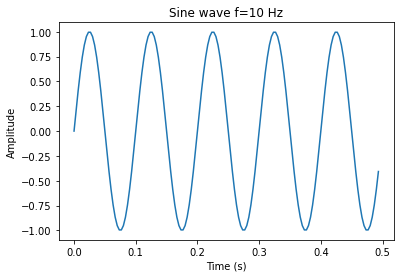

In [3]:
"""
Simulate a sinusoidal signal with given sampling rate
"""
import numpy as np
import matplotlib.pyplot as plt # library for plotting
#from signalgen import sine_wave # import the function

def sine_wave(f,overSampRate,phase,nCyl):
    """
    Generate sine wave signal with the following parameters
    Parameters:
        f : frequency of sine wave in Hertz
        overSampRate : oversampling rate (integer)
        phase : desired phase shift in radians
        nCyl : number of cycles of sine wave to generate
    Returns:
        (t,g) : time base (t) and the signal g(t) as tuple
    Example:
        f=10; overSampRate=30;
        phase = 1/3*np.pi;nCyl = 5;
        (t,g) = sine_wave(f,overSampRate,phase,nCyl)
    """
    fs = overSampRate*f # sampling frequency
    t = np.arange(0,nCyl*1/f-1/fs,1/fs) # time base
    g = np.sin(2*np.pi*f*t+phase) # replace with cos if a cosine wave is desired
    return (t,g) # return time base and signal g(t) as tuple

f = 10 #frequency = 10 Hz
overSampRate = 30 #oversammpling rate
fs = f*overSampRate #sampling frequency
phase = 0*np.pi #phase shift in radians
nCyl = 5 # desired number of cycles of the sine wave

(t,x) = sine_wave(f,overSampRate,phase,nCyl) #function call

plt.plot(t,x) # plot using pyplot library from matplotlib package
plt.title('Sine wave f='+str(f)+' Hz') # plot title
plt.xlabel('Time (s)') # x-axis label
plt.ylabel('Amplitude') # y-axis label
plt.show() # display the figure

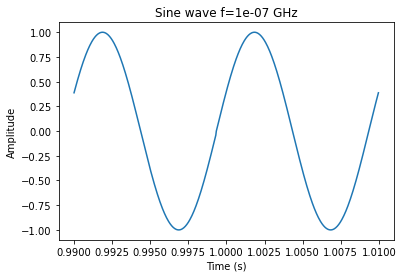

300


"\nNFFT=1024 #NFFT-point DFT      \nX=fft(x,NFFT) #compute DFT using FFT    \n\nfig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle\nnVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot\nax.plot(nVals,np.abs(X))      \nax.set_title('Double Sided FFT - without FFTShift')\nax.set_xlabel('Sample points (N-point DFT)')        \nax.set_ylabel('DFT Values')\n#fig1.show()\n"

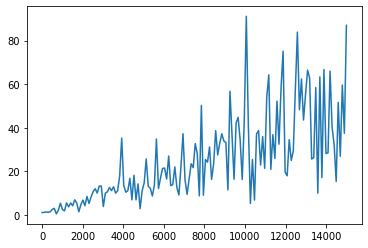

In [18]:
"""
Simulate a sinusoidal signal with random phase shifts at given baud rate given sampling rate

This I believe would kindof emulate depending how one sets/does phase shifts something like a random BPSK,QSPK or 8QAM signal
by varying the phase change to a value of set possibilities at a given time interval.
Depending if we just rotate back and forth between how many phase values depends on the modulation:
BPSK: 2 values: [0,np.pi]
QPSK: 4 values: [0,np.pi/2,np.pi,(3/2)*np.pi]
8QAM: 8 values: [0,(1/4)*np.pi,np.pi/2,(3/4)*np.pi,np.pi,(5/4)*np.pi,(3/2)*np.pi,(7/4)*np.pi]
16QAM: amplitude and phases
The goal is calculate how many cycles one must have at a given frequency before changing the phase
Then pick an option of a phase shift and change
The frequency of changing the phase should create the bandwidth or baudrate of interest
Thus for our target goal of 15MHz bandwidth about or 15MBd we would then at our 2.535GHz center frequency
number of cycles per baud would be -> 2.535 GHz / 15 MHz =
(2.535*10**9)/(15*10**6)
169 cycles per baud.... we should send at-least 1024 symbols.... then do FFT on that..
That should give the bandwidths we need for simulating random frequency

Optional TODOs: 
# Inputs can be Modulation, data stream, choose size of datastream to send, or time of transmission, or bauds..?
# maybe instead of random phase change, just make random data stream of x length size or time, then derive number of bauds
# Output write out a file
# FFT of generated signal
# Instead of phase offsets for pi/2,etc for qpsk make like real modulator with I,Q and add them together, it's the same thing right?
"""

import numpy as np
import matplotlib.pyplot as plt # library for plotting
import random
from scipy.fftpack import fft
#from signalgen import sine_wave # import the function
from numpy import linspace
from math import sqrt


def vary_phase_sine_wave(f,overSampRate,baudrate,total_symbols):
    """
    Generate sine wave signal with the following parameters
    Parameters:
        f : frequency of sine wave in Hertz
        overSampRate : oversampling rate (integer)
        phase : desired phase shift in radians
        cycle_per_baud : number of cycles of sine wave to generate
    Returns:
        (t,g) : time base (t) and the signal g(t) as tuple
    Example:
        f=10; overSampRate=30;
        phase = 1/3*np.pi;nCyl = 5;
        (t,g) = sine_wave(f,overSampRate,phase,nCyl)
    """
    fs = overSampRate*f # sampling frequency
    cycles_per_baud = f/baudrate
    phase_list = [0,np.pi/2,np.pi,(3/2)*np.pi]
    g = []
    t1 = np.arange(0,(cycles_per_baud*1/f-1/fs)*total_symbols,(1/fs)) # time base
    t = np.arange(0,(cycles_per_baud*1/f-1/fs),(1/fs)) # time base
    for x in range(0, total_symbols):
        phase = random.choice(phase_list)
        g.extend(np.sin(2*np.pi*f*t+phase)) # replace with cos if a cosine wave is desired
    return (t1,g) # return time base and signal g(t) as tuple

f = 100 #2535000000 #frequency = 2.535 GHz
overSampRate = 300 #oversammpling rate
fs = f*overSampRate #sampling frequency
#phase = 0*np.pi #phase shift in radians, we randomize this now
#nCyl = 5 # desired number of cycles of the sine wave, this is calculated from baudrate now
baudrate = 20 # baudrate of signal desired
#modulation_type = #choose how many phases to change between, and eventually maybe amplitude adjustments
total_symbols = 1024 #how many times to randomize a phase (future amplitude) change for changing symbols in modulation

(t,x) = vary_phase_sine_wave(f,overSampRate,baudrate,total_symbols) #function call

#For pretty short plot just plot a tiny bit for now..
minplot = fs-overSampRate
maxplot = fs+overSampRate
plt.plot(t[minplot:maxplot],x[minplot:maxplot]) # plot using pyplot library from matplotlib package
plt.title('Sine wave f='+str(f/10**9)+' GHz') # plot title
plt.xlabel('Time (s)') # x-axis label
plt.ylabel('Amplitude') # y-axis label
plt.show() # display the figure


"""From Signal_Gernartor.ipynb"""
N= overSampRate #len(x)
print(N)
xf = np.linspace(0, fs//2, N//2)
yf = fft(x)
yf = yf / sqrt(N)
#yf = yf / N

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(xf, abs(yf[0:N//2]))



"""from scipy.fftpack import fft, ifft
X = fft(x,N) #compute X[k]
x = ifft(X,N) #compute x[n]
"""
"""
NFFT=1024 #NFFT-point DFT      
X=fft(x,NFFT) #compute DFT using FFT    

fig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
nVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot
ax.plot(nVals,np.abs(X))      
ax.set_title('Double Sided FFT - without FFTShift')
ax.set_xlabel('Sample points (N-point DFT)')        
ax.set_ylabel('DFT Values')
#fig1.show()
"""

<ipython-input-5-561a126cd74b>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


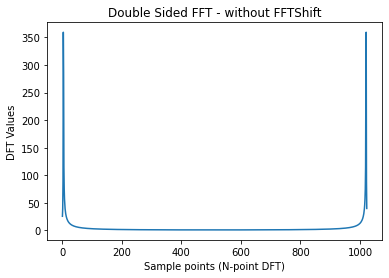

In [5]:
"""from scipy.fftpack import fft, ifft
X = fft(x,N) #compute X[k]
x = ifft(X,N) #compute x[n]
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

NFFT=1024 #NFFT-point DFT      
X=fft(x,NFFT) #compute DFT using FFT    

fig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
nVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot
ax.plot(nVals,np.abs(X))      
ax.set_title('Double Sided FFT - without FFTShift')
ax.set_xlabel('Sample points (N-point DFT)')        
ax.set_ylabel('DFT Values')
fig1.show()

<ipython-input-6-53dbbafa8c32>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


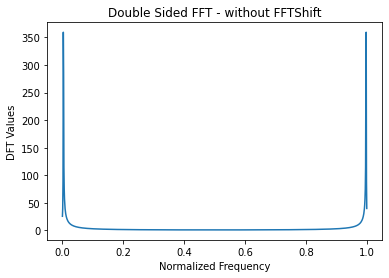

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

NFFT=1024 #NFFT-point DFT  
X=fft(x,NFFT) #compute DFT using FFT     

fig2, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
   
nVals=np.arange(start = 0,stop = NFFT)/NFFT #Normalized DFT Sample points         
ax.plot(nVals,np.abs(X))     
ax.set_title('Double Sided FFT - without FFTShift')        
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('DFT Values')
fig2.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift

NFFT=1024 #NFFT-point DFT      
X=fftshift(fft(x,NFFT)) #compute DFT using FFT  

fig3, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
    
fVals=np.arange(start = -NFFT/2,stop = NFFT/2)/NFFT #DFT Sample points        
ax.plot(fVals,np.abs(X))
ax.set_title('Double Sided FFT - with FFTShift')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('DFT Values');
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_xticks(np.arange(-0.5, 0.5+0.1,0.1))
fig.show()

NameError: name 'fig' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift

NFFT=1024     
X=fftshift(fft(x,NFFT))

fig4, ax = plt.subplots(nrows=1, ncols=1) #create figure handle

fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT
ax.plot(fVals,np.abs(X),'b')
ax.set_title('Double Sided FFT - with FFTShift')
ax.set_xlabel('Frequency (Hz)')         
ax.set_ylabel('|DFT Values|')
ax.set_xlim(-50,50)
ax.set_xticks(np.arange(-50, 50+10,10))
fig4.show()

In [ ]:
"""
TODO: change above power scale to log scale, make correct power spectrum... 
fun times
"""

In [53]:
"""
Random notes below from AJ...

From https://www.researchgate.net/post/How_can_I_generate_a_phase-randomized_signal_by_keeping_the_original_phases_related_to_the_most_significant_frequencies
There is lots of complicated answers but if you are looking for something super simple:
%1) Get FFT of signal, split to magnitude and phase
%2) Add randomness to the phases
%3) Recompile the fft (unsplit)
4) do inverse fft
Here is how to do it for a simple 1Hz sine wave sampled at 1000Hz
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
"""
fs = 1000
t = 0:1/fs:1-1/fs;
x = sin(2*pi*t);
Xf = fft(x);
Xf_mag = abs(Xf);
Xf_phase = angle(Xf);
%%% randomize the phases
a = -1; b = 1;
Xf_phase_new = Xf_phase + ((b-a).*rand(1,length(Xf)) + a)/phase_randomness;
Xf_new = Xf_mag.*exp(1i*Xf_phase_new);
x_new = ifft(Xf_new);
subplot(3,1,1);
plot(t,x);
subplot(3,1,2);
plot(t,x_new);
subplot(3,1,3);
plot(t,x,t,x_new);
"""

SyntaxError: invalid syntax (<ipython-input-53-cab2291a5476>, line 18)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # library for plotting

t = np.arange(100)
x = np.sin(0.1*2*np.pi*t)
s = x * np.hamming(100)
S = np.fft.fft(s)

S_mag = np.abs(S)
S_phase = np.angle(S)

#figa, ax = plt.subplots(nrows=1, ncols=2) #create figure handle
fig, axs = plt.subplots(5)
fig.suptitle('AJs learning')
axs[0].plot(t,S_mag,'.-')
axs[1].plot(t,S_phase,'.-')
#figa.show()
S = np.fft.fftshift(np.fft.fft(s))
axs[2].plot(t,S_mag,'.-')
f = np.arange(-0.5,0.5,1/100.0)
axs[3].plot(f,S_mag,'.-')

#Take the FFT of our samples. If we have x samples, the FFT size will be the length of x by default, so let’s only use the first 1024 samples as an example, to create a 1024-size FFT. The output will be 1024 complex float.
#Take the magnitude of the FFT output, which provides us 1024 real floats.
#Normalize: divide by our sample rate (F_s).
#Square the resulting magnitude, to get power.
#Convert to dB using 10 \log_{10}(), we always view PSDs in log scale.
#Perform an FFT shift, like we learned about last chapter, to move “0 Hz” in the center and negative frequencies to the left of center.

#S = np.fft.fftshift(np.fft.fft(s))



#I=cos(2*np.pi*f*t)
#Q=sin(2*np.pi*f*t)

#Note a DC spike in middle of signal is artifact from LO, direct mixing, and many remove this, but if see spike by itself then nothing is being modulated
#DC offsets are commonly done in SDR does high samapling rate and recenters, to make sure the DC tone isn't part of final signal
avg_pwr = np.mean(np.abs(x)**2)
#print(x)
#plt.figure(0)
#plt.plot(t,avg_pwr,'.-')
#plt.show()


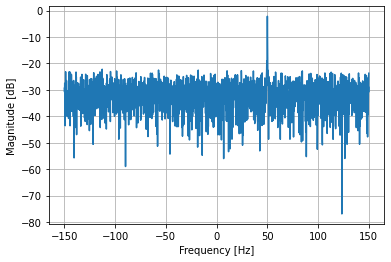

In [12]:
import matplotlib.pyplot as plt

Fs = 300 # sample rate
Ts = 1/Fs # sample period
N = 2048 # number of samples to simulate

t = Ts*np.arange(N)
x = np.exp(1j*2*np.pi*50*t) # simulates sinusoid at 50 Hz

n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # complex noise with unity power
noise_power = 2
r = x + n * np.sqrt(noise_power)

PSD = (np.abs(np.fft.fft(r))/N)**2
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.linspace(Fs/-2.0, Fs/2.0, N) # lazy method

plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int = np.random.randint(0, 4, num_symbols) # 0 to 3
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # np.exp() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()

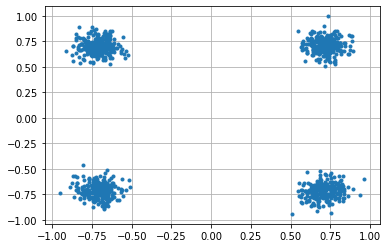

In [11]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()


In [32]:
"""
TODO: Debug and figure out phases and amplitudes in order to have a clean constellation like that of the QPSK code above.
"""

# Up QPSK to QAM 16

import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int = np.random.randint(0, 16, num_symbols) # 0 to 15
# if statements to determine phase and amplitude
x_symbols = []

for i in range(0,1000):
    if x_int[i] < 4:
        x_degrees = x_int[i]*360/4.0 + 45 # 45, 135, 225, 315 degrees
        x_radians = x_degrees*np.pi/180.0 # np.exp() takes in radians
        x_symbols.extend(0.25*(np.cos(x_radians) + 1j*np.sin(x_radians))) # this produces our 0000, 0001, 0010, 0011 symbols

    elif x_int[i] < 8:
        x_degrees = (x_int[i]-4)*360/4.0 + 45 # 45, 135, 225, 315 degrees
        x_radians = x_degrees*np.pi/180.0 # np.exp() takes in radians
        x_symbols.extend(0.5*(np.cos(x_radians) + 1j*np.sin(x_radians))) # this produces our 0100, 0101, 0110, 0111 symbols

    elif x_int[i] < 12:
        x_degrees = (x_int[i]-8)*360/4.0 + 45 # 45, 135, 225, 315 degrees
        x_radians = x_degrees*np.pi/180.0 # np.exp() takes in radians
        x_symbols.extend(0.75*(np.cos(x_radians) + 1j*np.sin(x_radians))) # this produces our 1000, 1001, 1010, 1011 symbols

    else:
        x_degrees = (x_int[i]-12)*360/4.0 + 45 # 45, 135, 225, 315 degrees
        x_radians = x_degrees*np.pi/180.0 # np.exp() takes in radians
        x_symbols.extend(np.cos(x_radians) + 1j*np.sin(x_radians)) # this produces our 1100, 1101, 1110, 1111 symbols

plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()

[ 4  9  7 12 11  4 13 13 10 12  3 10  4 14  5  3 14  3  3 11  0 12 12  5
  0 10  5 14  4 13 12  4  6  8  4 13  7 11  9  0  5 15  6  6 13  9 15  7
  9 11  3  6  1  1  6  2 14  5  4 14  7  4  4 15  9 15  3  2  2 15 11  6
 13  3 13  3  6 11  9  5  4 12 15  9 14  5  0  4 10  5  9 11  6  3  3 10
  9 12  9 15  9  7  2  2  1 13  0  8 13 15  1  2 14  1  7 14  8  6  3  7
 15  1 14  8  8  8 13 12  7  1  4 15  4 13 12 10  2  3  4 10  1  4 14  0
 10  6 15  7  8  9  8  6  5 11  5  7  6 10 12 13  2  8 11  8  4 14 11 14
 11  3 14  8  8  5  0 12  3  8 10  1  8  8 12 12  7  9  4 12  3  6 12 12
 14 14 14 10  7 11 12 11 14  2  9  0  2  5  6  5  9  0 15  6 10  5 15 15
  0  2 10 10 12  7  9  6 11  3 13  5  8  5  0  6 15 13  0 13  0  2  1  6
  0  1  8  4 14  9  6 10  5 12  5  5  3 14  6 13  5  1  6 14 13  4  9 14
  2 13  5  8  8 11  5  4  1  6 10  7 13 10  1  8  1  8 13  0  9 15  3  4
 11  5  5  9  1  7 13 11  6  5  0  3  7 13  2 12 15  8 10 11 15 11 11  9
 12 10  7 12 10  2 11 13  2  2 10  7 11  4  6 12  6

TypeError: 'numpy.complex128' object is not iterable

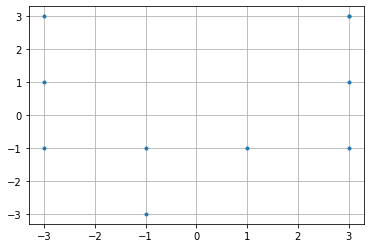

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


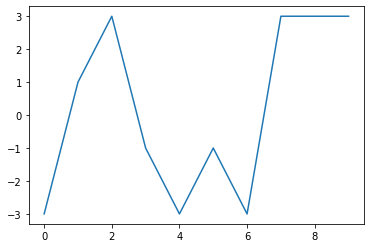

In [2]:
"""
Working QAM16 Symbol Generation
num_symbols = Number of symbols to be generated
array_value_list = List of constellation plot values arbitrarily assigned to binary values
Plot shows all of the constellation points
"""

import numpy as np
import matplotlib.pyplot as plt
import random


num_symbols = 10
x_symbols = []
array_value_list = [-3-3j, -3-1j, -3+3j, -3+1j, -1-3j, -1-1j, -1+3j, -1+1j, +3-3j, +3-1j, 3+3j, 3+1j, 1-3j, 1-1j, 1+3j, 1+1j]

ind = np.random.randint(0, 16, num_symbols)
for i in ind:
    val = array_value_list[i]
    x_symbols.append(val)
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()
plt.figure()
plt.plot(x_symbols)

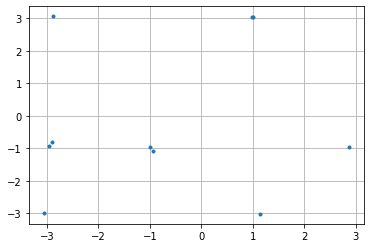

In [2]:
"""
Previous Constellation Plot with added Noise.
"""
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

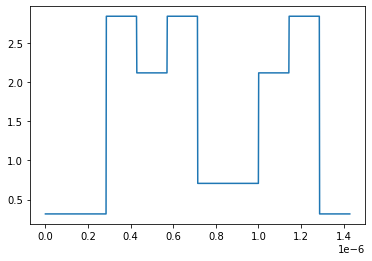

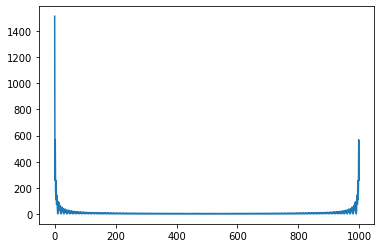

In [3]:
"""
TODO: Modulate QAM16 symbols into a complex baseband signal


Below code is my attempt at modulating the list of QAM16 symbols into a signal at 7 MHz. I'm sure I'm doing more than a few things wrong, so feel free to commment and help out. THANKS!
"""
from scipy.fftpack import fft,fftshift
fs = 7e6
Ts = 1/fs
phase = np.arctan(np.imag(x_symbols)/np.real(x_symbols))
amp = np.abs(x_symbols)

t = np.linspace(0,Ts,100)
tfull = np.linspace(0,Ts*len(x_symbols),100*len(x_symbols))
x = []

for i in range(len(x_symbols)):
    x.extend(amp[i]*(np.cos(2*np.pi*t+phase[i])**2))
    
plt.plot(tfull,x)
plt.figure(2)
fps = fft(x)
plt.plot(np.abs(fps))

In [ ]:
from scipy.fftpack import fft,fftshift
f = 7e6
Ts = 1/f
phase = np.arctan(np.imag(x_symbols)/np.real(x_symbols))
amp = np.abs(x_symbols)
exp = []

for i in range(len(phase)):
    exp1 = amp[i]*np.exp(phase[i])
    exp.append(exp1)
    
duration = 1.0
fs = 7e6
samples = int(fs*duration)
t = np.arange(samples) / fs
    
#for i in range(len(exp)):
#    xsamp = exp[i]*sample
#    x.extend(xsamp)
    
plt.plot(tf,x)
plt.figure(2)
fps = fft(x)
plt.plot(t,sample)
plt.figure(3)
plt.plot(np.abs(fps))
#fps = fftshift(fps)
#plt.figure(4)
#plt.plot(np.abs(fps))
#plt.set_xlim(-len(x_symbols)/2,len(x_symbols)/2)